<a href="https://colab.research.google.com/github/clustering-jun/KMU-Data_Science/blob/main/L09_PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PageRank Practice**

- http://webdatacommons.org/hyperlinkgraph/

In [3]:
import requests

with open('example_index', 'wb') as f:
    r = requests.get('http://webdatacommons.org/hyperlinkgraph/data/example_index')
    f.write(r.content)

with open('example_arcs', 'wb') as f:
    r = requests.get('http://webdatacommons.org/hyperlinkgraph/data/example_arcs')
    f.write(r.content)

In [ ]:
import numpy as np

nodes = np.loadtxt('example_index', dtype=object)[:,0]
edges = np.loadtxt('example_arcs', dtype=int)

print(nodes)
print(edges)

## **PageRank in NetworkX**

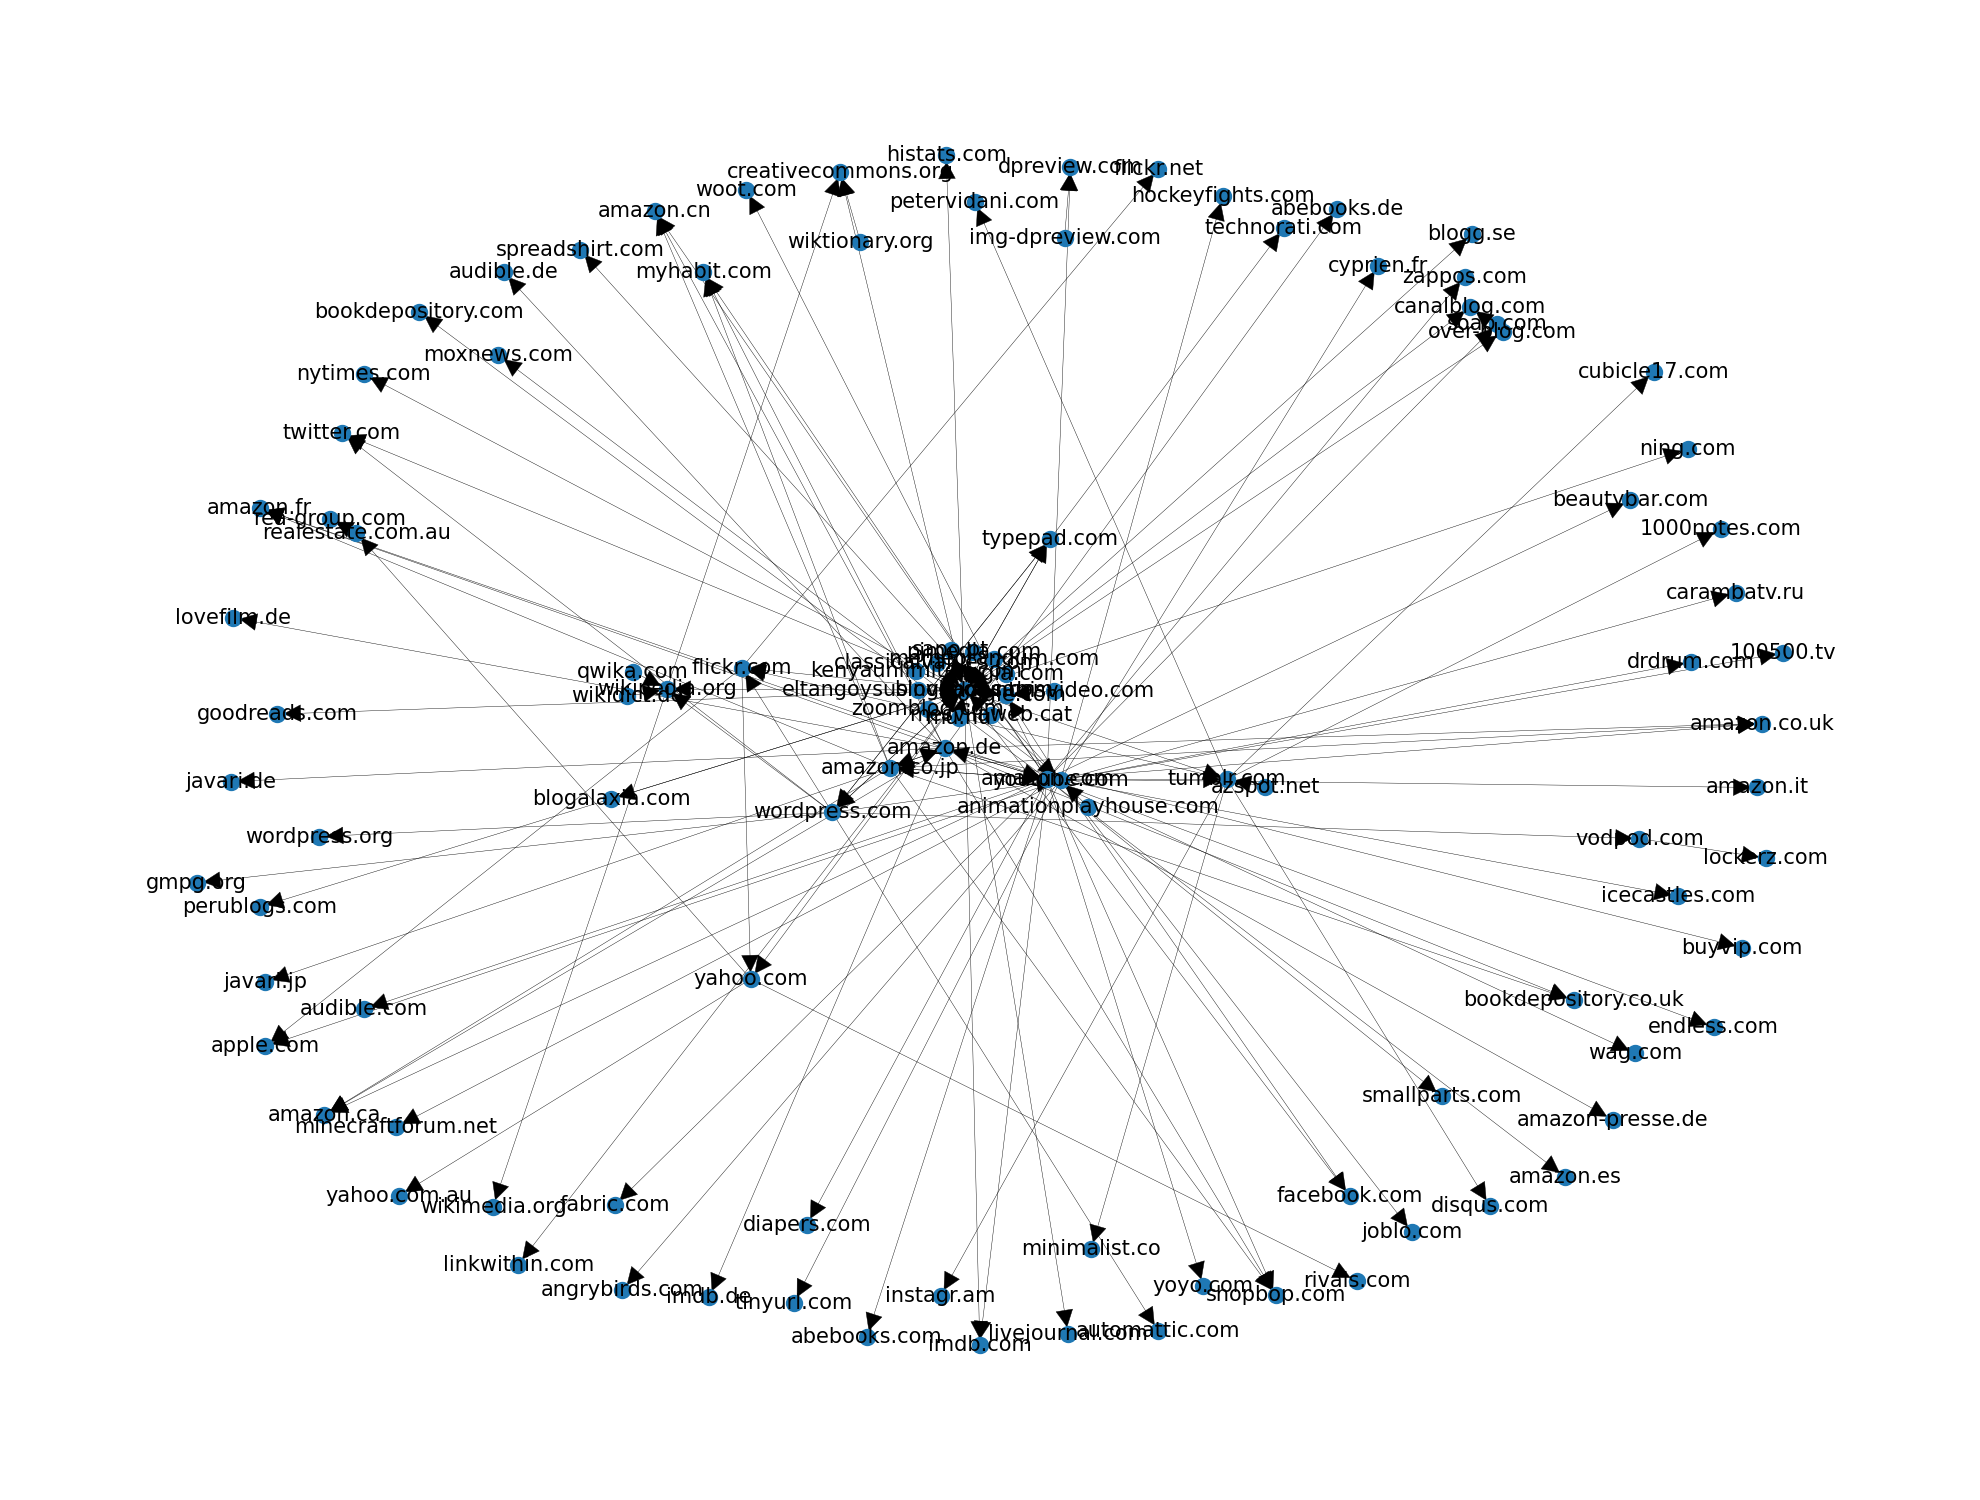

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for u, v in edges:
    G.add_edge(nodes[u], nodes[v])

plt.figure(dpi=300)
nx.draw(G, with_labels=True, node_size=10, font_size=5, width=0.1)

In [15]:
r = nx.pagerank(G, 0.85)

for pair in sorted(r.items(), key=lambda x: -x[1])[:10]:
    print(pair)

('blogspot.com', 0.08542425762544206)
('creativecommons.org', 0.024220103814991234)
('wikipedia.org', 0.021582586522641486)
('canalblog.com', 0.017730661911958275)
('youtube.com', 0.016119265401656313)
('tumblr.com', 0.015904254686443048)
('google.com', 0.015904254686443048)
('wikimedia.org', 0.015599528017970031)
('rea-group.com', 0.015057970139281873)
('yahoo.com', 0.013150763969634)


## **Implementation**

In [16]:
def pagerank(edges, n_nodes, beta=0.85, n_epochs=100):

    d = [0] * n_nodes
    for u, v in edges:
        d[u] += 1

    r = [1/n_nodes] * n_nodes

    for _ in range(n_epochs):
        r_next = [(1-beta) / n_nodes] * n_nodes

        for u, v in edges:
            r_next[v] += beta * r[u] / d[u]

        r_next_sum = sum(r_next)
        for u in range(n_nodes):
            r_next[u] += (1-r_next_sum)/n_nodes

        r = r_next

    return r

In [23]:
n_nodes = len(nodes)
r = pagerank(edges, n_nodes)
for pair in sorted(zip(r, nodes), reverse=True)[:10]:
    print(pair)

(0.08542594911159553, 'blogspot.com')
(0.024220197373806852, 'creativecommons.org')
(0.021582303280083353, 'wikipedia.org')
(0.017731207533385678, 'canalblog.com')
(0.016119021304844727, 'youtube.com')
(0.0159040414865913, 'tumblr.com')
(0.0159040414865913, 'google.com')
(0.015599869453139691, 'wikimedia.org')
(0.015057808460245185, 'rea-group.com')
(0.013150737408590824, 'yahoo.com')
